<a href="https://colab.research.google.com/github/Marvin98765/iris/blob/main/colorSensor_dataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Color Sensor - Data Analysis**

In [2]:
import pandas as pd

In [6]:
 #!wget https://github.com/Marvin98765/iris/blob/main/colorSensor/data/white_old_long.csv

--2023-08-27 18:55:32--  https://github.com/Marvin98765/iris/blob/main/colorSensor/data/white_old_long.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7579 (7.4K) [text/plain]
Saving to: ‘white_old_long.csv’

white_old_long.csv  100%[===================>]   7.40K  --.-KB/s    in 0s      

2023-08-27 18:55:32 (92.5 MB/s) - ‘white_old_long.csv’ saved [7579/7579]



In [56]:
def create_df(files = []):
  df_measurement = pd.DataFrame([])
  for file_i in files:
    df = pd.read_csv(filepath_or_buffer = "/content/" + file_i + ".csv", sep = ",", header = 0, index_col = 0)
    df_rgbi = pd.DataFrame(df["RGBI_measurement"].apply(lambda x: eval(x)).to_list(), columns=['val_r', 'val_g', 'val_b', 'val_i'])
    df_hsv  = pd.DataFrame(df["HSV_measurement"].apply(lambda x: list(eval(x))).to_list(), columns=['val_h', 'val_s', 'val_v'])
    df = pd.concat([df, df_rgbi, df_hsv], axis=1, join="inner")
    df_measurement = pd.concat([df_measurement, df], ignore_index=True)
  return df_measurement

In [89]:
files_all = []
files_all = files_all + ['white_old_short', 'white_old_mid', 'white_old_long', 'white_old_longest']
files_all = files_all + ['black_short', 'black_mid', 'black_long', 'black_longest']
files_all = files_all + ['blue_short', 'blue_mid', 'blue_long', 'blue_longest']
files_all = files_all + ['magenta_short', 'magenta_mid', 'magenta_long', 'magenta_longest']
files_all = files_all + ['yellow_short', 'yellow_mid', 'yellow_long', 'yellow_longest']
files_all = files_all + ['red_short', 'red_mid', 'red_long']
files_short = []
files_short = files_short + ['white_old_short']
files_short = files_short + ['black_short']
files_short = files_short + ['blue_short']
files_short = files_short + ['magenta_short']
files_short = files_short + ['yellow_short']
files_short = files_short + ['red_short']
files_mid = []
files_mid = files_mid + ['white_old_mid']
files_mid = files_mid + ['black_mid']
files_mid = files_mid + ['blue_mid']
files_mid = files_mid + ['magenta_mid']
files_mid = files_mid + ['yellow_mid']
files_mid = files_mid + ['red_mid']
files_long = []
files_long = files_long + ['white_old_long']
files_long = files_long + ['black_long']
files_long = files_long + ['blue_long']
files_long = files_long + ['magenta_long']
files_long = files_long + ['yellow_long']
files_long = files_long + ['red_long']
files_longest = []
files_longest = files_longest + ['white_old_longest']
files_longest = files_longest + ['black_longest']
files_longest = files_longest + ['blue_longest']
files_longest = files_longest + ['magenta_longest']
files_longest = files_longest + ['yellow_longest']
files_longest = files_longest + []
df_measurement = create_df(files = files_all)
df_measurement
df_longest_measurement = create_df(files = files_longest)
df_long_measurement = create_df(files = files_long)
df_mid_measurement = create_df(files = files_mid)
df_short_measurement = create_df(files = files_short)

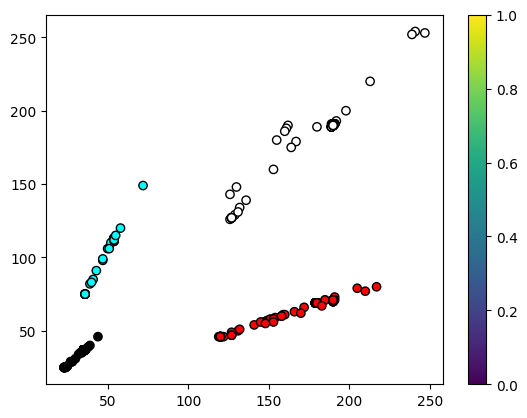

In [91]:
import matplotlib.pyplot as plt
x = df_short_measurement['val_r'].values
y = df_short_measurement['val_g'].values
colors = df_short_measurement['color_measurement'].values
plt.scatter(x, y, c = colors, edgecolors = "black")
plt.colorbar();  # show color scale

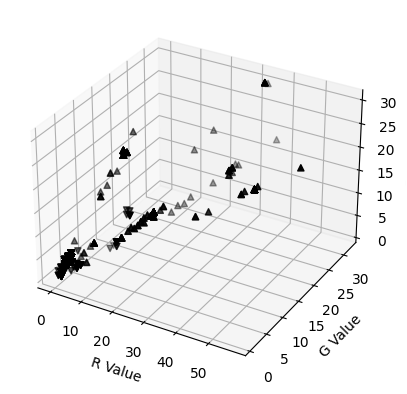

In [97]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#xs = df_short_measurement['val_r'].values
#ys = df_short_measurement['val_g'].values
#zs = df_short_measurement['val_b'].values
#colors = df_short_measurement['color_measurement'].values
#ax.scatter(xs, ys, zs, marker="o", c = colors, edgecolors = "black")
#xs = df_mid_measurement['val_r'].values
#ys = df_mid_measurement['val_g'].values
#zs = df_mid_measurement['val_b'].values
#colors = df_mid_measurement['color_measurement'].values
#ax.scatter(xs, ys, zs, marker="s", c = colors, edgecolors = "black")
xs = df_long_measurement['val_r'].values
ys = df_long_measurement['val_g'].values
zs = df_long_measurement['val_b'].values
colors = df_long_measurement['color_measurement'].values
ax.scatter(xs, ys, zs, marker="^", c = colors, edgecolors = "black")
xs = df_longest_measurement['val_r'].values
ys = df_longest_measurement['val_g'].values
zs = df_longest_measurement['val_b'].values
colors = df_longest_measurement['color_measurement'].values
ax.scatter(xs, ys, zs, marker="v", c = colors, edgecolors = "black")

ax.set_xlabel('R Value')
ax.set_ylabel('G Value')
ax.set_zlabel('B Value')
plt.show()

In [81]:
colors = df_measurement['color_real'].values
colors

array(['white_old', 'white_old', 'white_old', ..., 'red', 'red', 'red'],
      dtype=object)

In [87]:
colors = [color_i.replace('_old', '') for color_i in colors]
colors = [color_i.replace('_new', '') for color_i in colors]
colors = [color_i.replace('_dark', '') for color_i in colors]

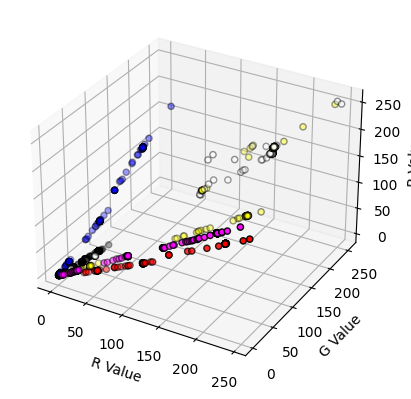

In [88]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = df_measurement['val_r'].values
ys = df_measurement['val_g'].values
zs = df_measurement['val_b'].values
ax.scatter(xs, ys, zs, marker="o", c = colors, edgecolors = "black")
ax.set_xlabel('R Value')
ax.set_ylabel('G Value')
ax.set_zlabel('B Value')
plt.show()